In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../mf-pcba/retrieved/AID1445/SD.csv')
df

,CID,SD,SD Z-score,DR,XC50,Activity,neut-smiles,# stereocenters
0,6871630,100.73,14.943804,NaN,NaN,Inactive,CC(C)(C)C(=O)Nc1ccc(C(=O)NN=Cc2ccccc2OC(=O)c2c...,0
1,1594634,99.86,14.809824,6.000000,1.00,Active,O=C1N=c2ccc(Br)cc2=C1c1sc(=S)n(NS(=O)(=O)c2ccc...,0
2,2187941,98.34,14.575744,5.657577,2.20,Active,CCN1C(=O)C(=Cc2ccc(-c3ccc([N+](=O)[O-])cc3OC)o...,0
3,6872002,97.76,14.486424,6.000000,1.00,Active,Cc1cccc(C)c1OCc1nc2ccccc2c(=O)n1N=Cc1ccc(OCC(=...,0
4,16189301,96.64,14.313945,5.492144,3.22,Active,CC(=O)N1C(=O)C(=C2SC(=S)N(NS(=O)(=O)c3ccc(C)cc...,0
...,...,...,...,...,...,...,...,...
207091,918318,-30.82,-5.314887,NaN,NaN,Inactive,Brc1ccc(OCc2nc(-c3ccccn3)n[nH]2)cc1,0
207092,3138360,-32.82,-5.622886,NaN,NaN,Inactive,CCCCCC(=O)NNC(=S)NC(=O)c1ccccc1[N+](=O)[O-],0
207093,1978861,-35.02,-5.961686,NaN,NaN,Inactive,CCC(C)(C)C(=O)Nc1ncc(S(=O)(=O)c2ccc([N+](=O)[O...,0
207094,2121895,-35.18,-5.986326,NaN,NaN,Inactive,COc1ccccc1CCC(=O)Nc1nc2ccccc2[nH]1,0


In [3]:
df.count()

CID                207096
SD                 207096
SD Z-score         207096
DR                    655
XC50                  655
Activity           207096
neut-smiles        207096
# stereocenters    207096
dtype: int64

In [4]:
df[['SD','DR','XC50']].describe()

,SD,DR,XC50
count,207096.000000,655.000000,655.000000
mean,3.714699,4.446591,46.474321
std,6.490179,0.356258,35.531813
min,-39.680000,3.208590,1.000000
25%,-0.130000,4.204502,24.515000
50%,3.010000,4.375409,42.130000
75%,6.770000,4.610568,62.445000
max,100.730000,6.000000,618.600000


<Axes: >

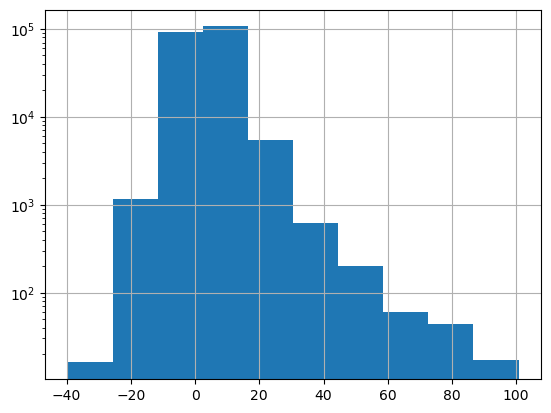

In [5]:
df.SD.hist(log=True)

<Axes: >

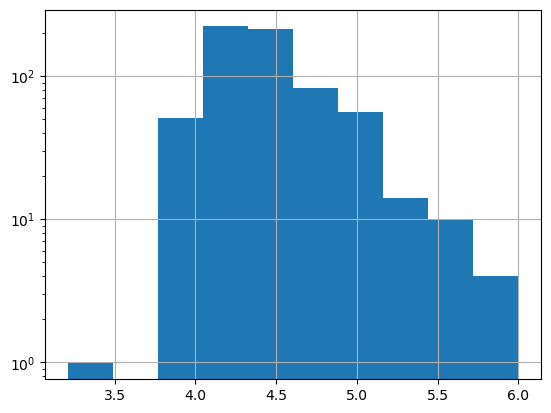

In [6]:
df.DR.hist(log=True)

In [7]:
df = df.rename(columns={'neut-smiles':'smiles'})
df = df[['smiles', 'SD', 'DR']]
df

,smiles,SD,DR
0,CC(C)(C)C(=O)Nc1ccc(C(=O)NN=Cc2ccccc2OC(=O)c2c...,100.73,NaN
1,O=C1N=c2ccc(Br)cc2=C1c1sc(=S)n(NS(=O)(=O)c2ccc...,99.86,6.000000
2,CCN1C(=O)C(=Cc2ccc(-c3ccc([N+](=O)[O-])cc3OC)o...,98.34,5.657577
3,Cc1cccc(C)c1OCc1nc2ccccc2c(=O)n1N=Cc1ccc(OCC(=...,97.76,6.000000
4,CC(=O)N1C(=O)C(=C2SC(=S)N(NS(=O)(=O)c3ccc(C)cc...,96.64,5.492144
...,...,...,...
207091,Brc1ccc(OCc2nc(-c3ccccn3)n[nH]2)cc1,-30.82,NaN
207092,CCCCCC(=O)NNC(=S)NC(=O)c1ccccc1[N+](=O)[O-],-32.82,NaN
207093,CCC(C)(C)C(=O)Nc1ncc(S(=O)(=O)c2ccc([N+](=O)[O...,-35.02,NaN
207094,COc1ccccc1CCC(=O)Nc1nc2ccccc2[nH]1,-35.18,NaN


In [8]:
# drop 90% of rows where DR is NaN, so resulting df
sampled_nan_df = df.loc[df['DR'].isna()].sample(frac=0.1, random_state=0)
not_nan_df = df.loc[~df['DR'].isna()]
new_df = pd.concat([sampled_nan_df, not_nan_df]).sort_index()
new_df

,smiles,SD,DR
1,O=C1N=c2ccc(Br)cc2=C1c1sc(=S)n(NS(=O)(=O)c2ccc...,99.86,6.000000
2,CCN1C(=O)C(=Cc2ccc(-c3ccc([N+](=O)[O-])cc3OC)o...,98.34,5.657577
3,Cc1cccc(C)c1OCc1nc2ccccc2c(=O)n1N=Cc1ccc(OCC(=...,97.76,6.000000
4,CC(=O)N1C(=O)C(=C2SC(=S)N(NS(=O)(=O)c3ccc(C)cc...,96.64,5.492144
5,CC(CCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CCC12C,94.09,5.585027
...,...,...,...
207040,Cn1cc(C(=O)c2ccc(Cl)cc2Cl)cc1C(=O)NN=C(N)COc1c...,-21.65,NaN
207058,Cc1c(C(=O)NNC(=S)Nc2cccc(Cl)c2)nnn1-c1ccccc1,-22.94,NaN
207069,COc1ccccc1NC(=S)NNC(=O)c1ccc(Cl)cc1Cl,-23.82,NaN
207070,Oc1c(C(Nc2ccccn2)c2cccnc2)cc(Cl)c2cccnc12,-24.05,NaN


In [9]:
new_df.count()

smiles    21299
SD        21299
DR          655
dtype: int64

In [10]:
# drop rows with NaN values for cosmo
new_df = new_df.dropna(subset=['SD'])
new_df

,smiles,SD,DR
1,O=C1N=c2ccc(Br)cc2=C1c1sc(=S)n(NS(=O)(=O)c2ccc...,99.86,6.000000
2,CCN1C(=O)C(=Cc2ccc(-c3ccc([N+](=O)[O-])cc3OC)o...,98.34,5.657577
3,Cc1cccc(C)c1OCc1nc2ccccc2c(=O)n1N=Cc1ccc(OCC(=...,97.76,6.000000
4,CC(=O)N1C(=O)C(=C2SC(=S)N(NS(=O)(=O)c3ccc(C)cc...,96.64,5.492144
5,CC(CCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CCC12C,94.09,5.585027
...,...,...,...
207040,Cn1cc(C(=O)c2ccc(Cl)cc2Cl)cc1C(=O)NN=C(N)COc1c...,-21.65,NaN
207058,Cc1c(C(=O)NNC(=S)Nc2cccc(Cl)c2)nnn1-c1ccccc1,-22.94,NaN
207069,COc1ccccc1NC(=S)NNC(=O)c1ccc(Cl)cc1Cl,-23.82,NaN
207070,Oc1c(C(Nc2ccccn2)c2cccnc2)cc(Cl)c2cccnc12,-24.05,NaN


In [11]:
new_df.count()

smiles    21299
SD        21299
DR          655
dtype: int64

In [12]:
new_df.to_csv('tests/data/pubchem_AID1445_sd_dr_0.1.csv', index=False)